# Part 2: Summary and Visualizations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.collocations import *
from nltk import FreqDist
from nltk.probability import FreqDist
from os import path
from PIL import Image

import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import random
import plotly.io as pio

 #display plotly figures
pio.renderers.default = "plotly_mimetype+notebook_connected"

In [2]:
path = '../nfh2118/Assignment 02/community_board_311.csv'
df = pd.read_csv(path,index_col=0)

# Value Count Bar Plots for Complaint Type and Agency

We'll use Plotly horizontal bar charts to visualize the distribution of calls across different complaint and agency categories. The top 30 most frequent complaint types and their corresponding counts are assigned to y and x lists, respectively. The lists are reversed so that the most frequent complaint types appear at the top of the chart. Then, the lists are converted to a dataframe and plotted with plotly.express.bar.

In [3]:
complaint_type_x = list(df["complaint_type"].value_counts()[0:10])
complaint_type_y = list(df["complaint_type"].value_counts()[0:10].index)

complaint_type_x.reverse()
complaint_type_y.reverse()

complaint_type_count_df = pd.DataFrame({"Total Calls": complaint_type_x, "Complaint Type": complaint_type_y})

complaint_type_fig = px.bar(complaint_type_count_df, x="Total Calls", y="Complaint Type", 
             orientation='h',
             height=700, color = "Total Calls",
             color_discrete_sequence = px.colors.sequential.thermal)

complaint_type_fig.update_layout(hovermode='x',
                  title="Top 10 Most Frequent 311 Complaint Types",
                  font=dict(family="silom",
                  size=14, color="#58508d"))

complaint_type_fig.show()

Complaints related to noise, illegal parking, damaged tress, sanitation, and utilities are the most common. The same process is repeated below to create a bar chart for the agency value counts.

In [4]:
agency_x = list(df["agency"].value_counts())
agency_y = list(df["agency"].value_counts().index)

agency_x.reverse()
agency_y.reverse()

agency_count_df = pd.DataFrame({"Total Calls": agency_x, "Agency": agency_y})

agency_fig = px.bar(agency_count_df, x="Total Calls", y="Agency", 
             orientation='h',
             height=700, color = "Total Calls",
             color_discrete_sequence = px.colors.sequential.thermal)

agency_fig.update_layout(hovermode='x',
                  title="311 Call Counts by Agency",
                  font=dict(family="silom",
                  size=14, color="#58508d"))

agency_fig.show()

The New York Police Department (NYPD) responds to the majority of 311 calls in New York City. Conversely, the Dpt of Ed (DOE) and Dpt of Information Technology & Telecommunications (DOITT), respond to so few calls that their count does not appear on the above plot's hover data. In the modeling phase, these agencies will be oversampled so that the models will have enough data to recognize relevant calls.

# Descriptor Wordcloud 

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def clean_words(text):
    
    """Takes in a string or iterable of strings, and returns a cleaned list 
       of words in the text that was passed in."""
    
    #join all strings in text and separate them by white space
    joined_text = " ".join(text) 
    
    #remove all characters that are not letters
    joined_text = re.sub('[^A-Za-z ]+', ' ', joined_text)
    
    #convert all words in list to their base form, or 'lemma'
    words = [WordNetLemmatizer().lemmatize(word) for word in joined_text]
    
    #create a list of individual strings for each word in the text 
    words = word_tokenize(joined_text)
    
    
    clean_words_list = []
    
    for word in words:
        
        #exclude words that don't contribute to the meaning of the text
        stopwords_list = stopwords.words('english')
        for w in ['http', 'com', 'amp', 'www']:
            stopwords_list.append(w)
        
        if len(word) > 2 and word not in stopwords_list:
            
            #populate clean words list with remaining words
            clean_words_list.append(word.lower())
    
    return clean_words_list

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#run the function on the descriptor column
clean_descriptor = clean_words(df.descriptor)

In [22]:
#Image Attribution: Designed by vectorstock (Image #19210492 at VectorStock.com)
mask = np.array(Image.open('../nfh2118/Assignment 02/vectorstock_19210492.png'))

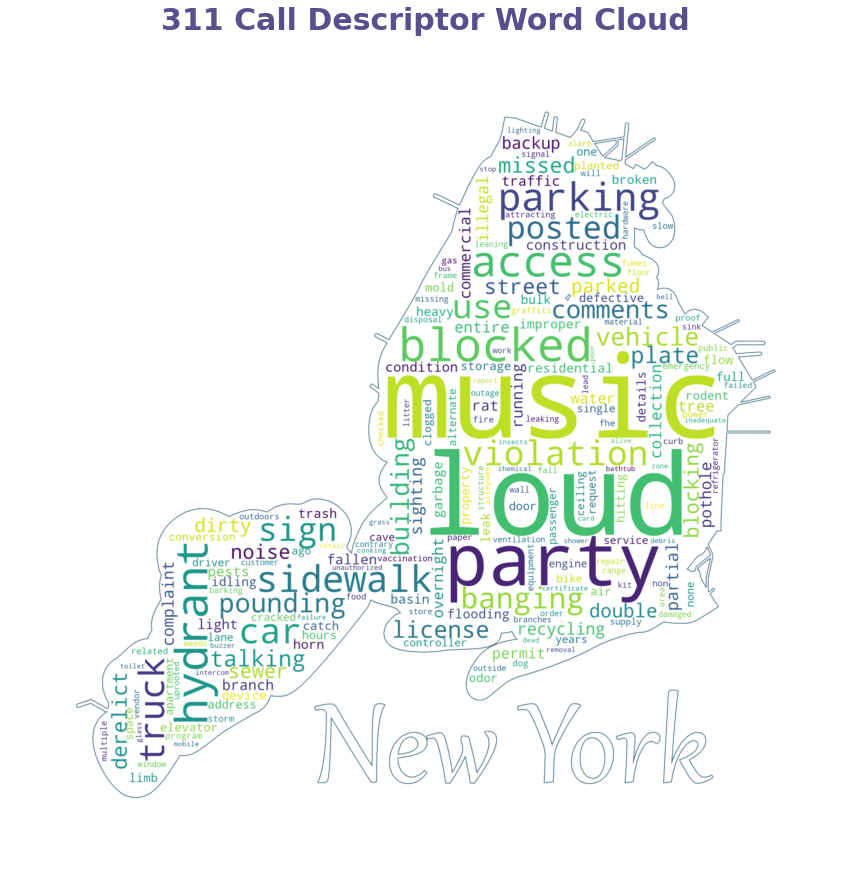

In [23]:
wc = WordCloud(background_color="white", mask=mask, max_words=200, 
               max_font_size =500, collocations=False,
               contour_width=2, contour_color='#51788c')

clean_string = '.'.join(clean_descriptor)
wc.generate(clean_string)

f = plt.figure(figsize=(15,17))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')

font_dict = {'fontsize': 30, 'color': '#58508d', 'weight': 'bold'}

plt.title('311 Call Descriptor Word Cloud', fontdict=font_dict)
plt.axis("off")
plt.show()

### Reference
"Bar Charts in Python" - How to Make Bar Charts in Python
(Source:
https://plotly.com/python/bar-charts/, accessed on October 24, 2021)

"Masked wordcloud" - Using a mask you can generate wordclouds in arbitrary shapes
(Source: https://amueller.github.io/word_cloud/auto_examples/masked.html, accessed on October 24, 2021)